# Data Analytics III
**1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
<br>
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

## Loading the Dataset

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [6]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

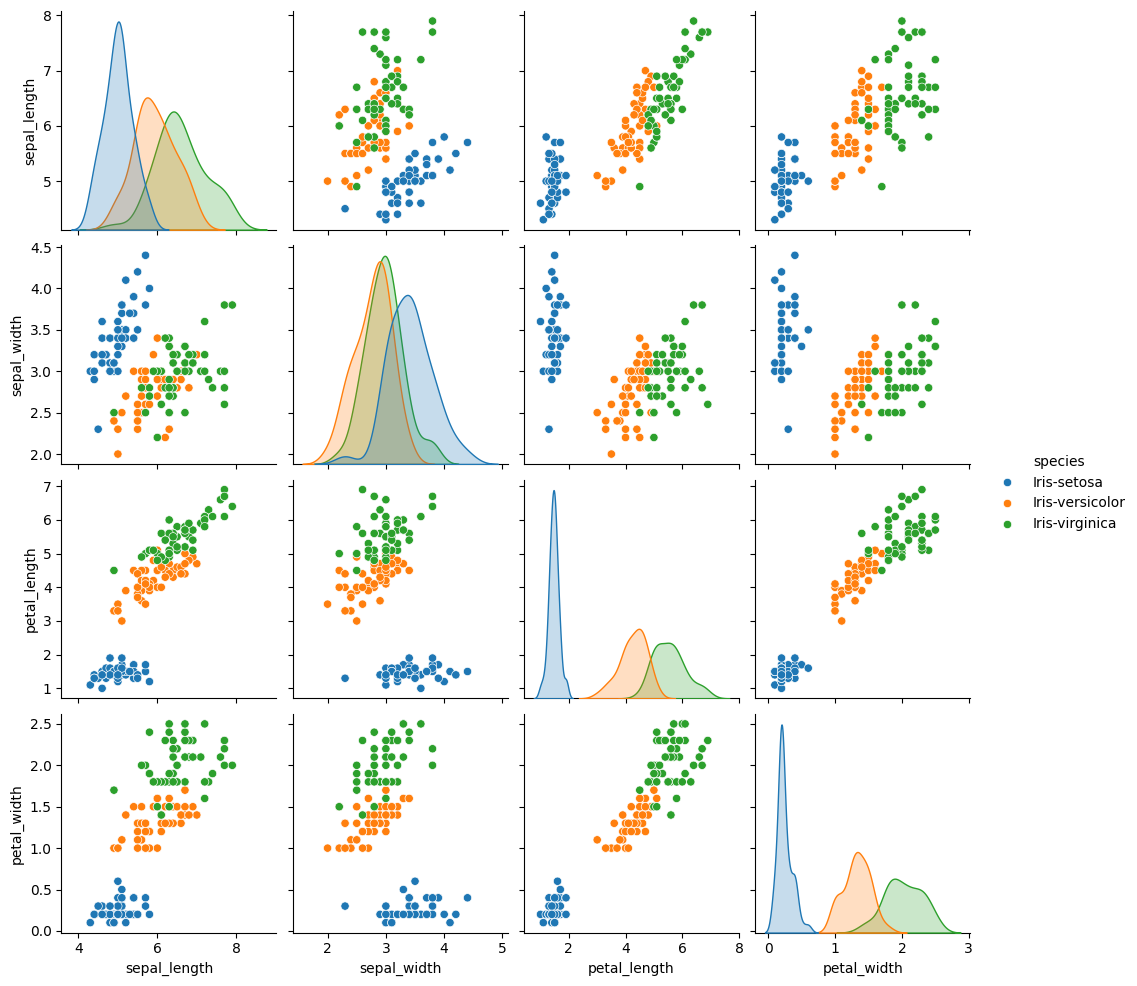

In [8]:
sns.pairplot(df, hue='species')
plt.show()

## Data Preprocessing

In [9]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Gaussian Naive Bayes Model

In [35]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [36]:
# predict
y_pred = classifier.predict(x_test)

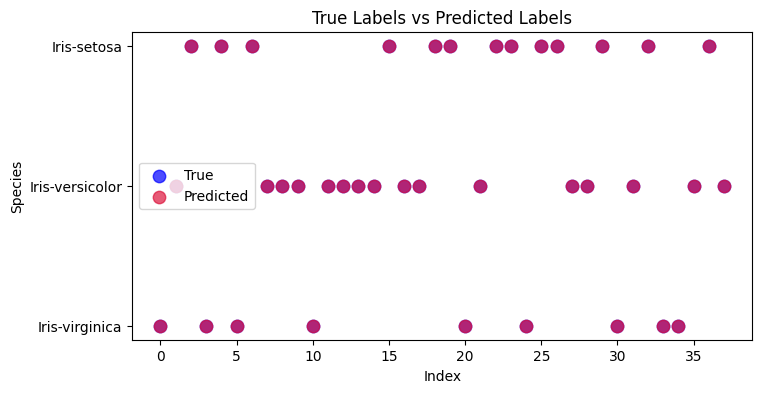

In [37]:
# visualize
# Visualize predicted vs true labels
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.7, s=80, label='True')
plt.scatter(range(len(y_pred)), y_pred, color='crimson', alpha=0.7, s=80, label='Predicted')
plt.title('True Labels vs Predicted Labels')
plt.xlabel('Index')
plt.ylabel('Species')
plt.legend()
plt.show()

## Confusion Matrix

In [38]:
# calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


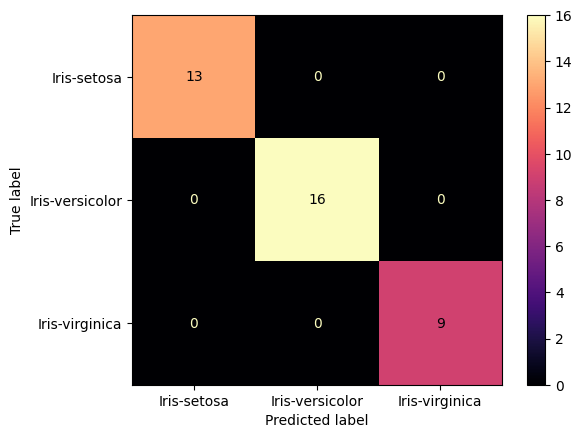

In [39]:
# visualizing the confusion matrix
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
conf_matrix.plot(cmap = 'magma')
plt.show()

In [40]:
# performance metrics report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [41]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
